Shape: (4600, 18)

Missing Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


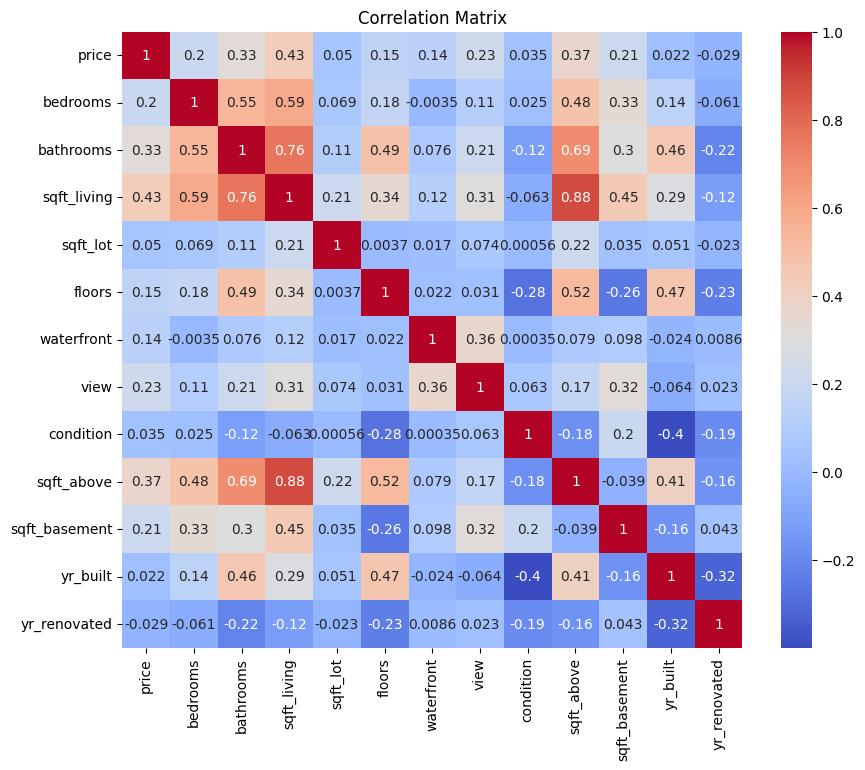

Linear Regression - R2 Score: 0.032, MSE: 986921767056.10
Random Forest - R2 Score: 0.028, MSE: 991775851992.81


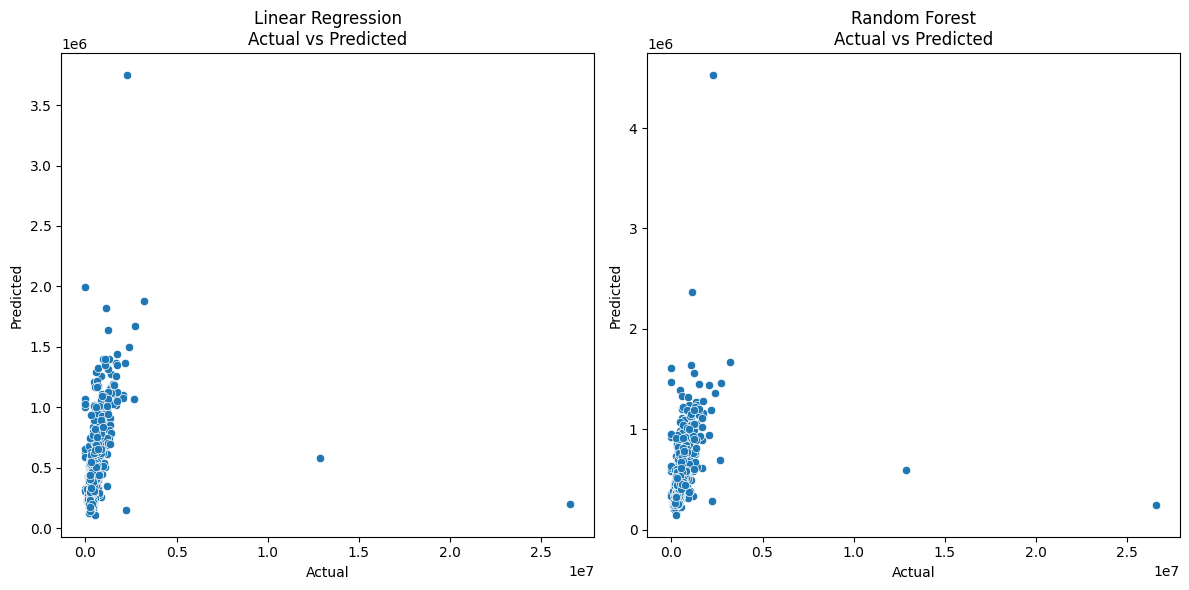

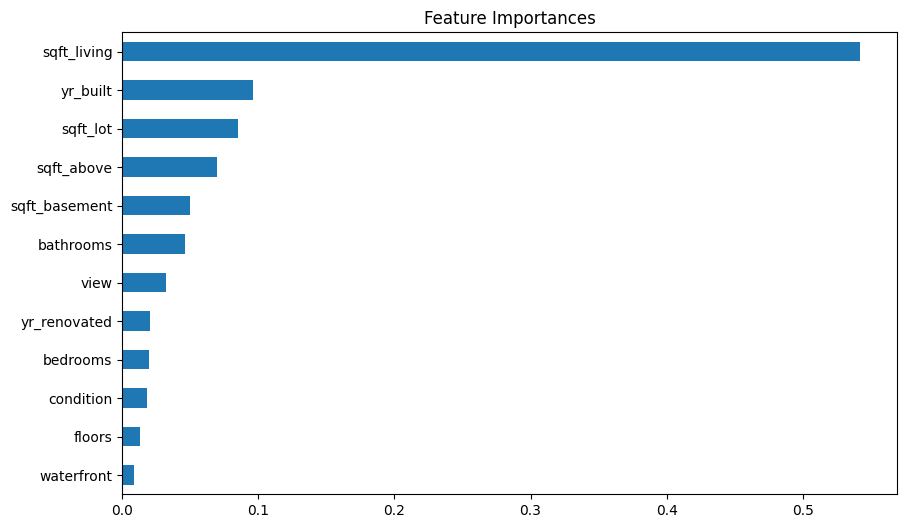

✅ Project Completed: Model Trained and Evaluated Successfully


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("data.csv")


print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


df = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'])


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


X = df.drop(columns='price')
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)



def evaluate_model(name, y_true, y_pred):
    print(f"{name} - R2 Score: {r2_score(y_true, y_pred):.3f}, MSE: {mean_squared_error(y_true, y_pred):.2f}")

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_pred)
plt.title("Linear Regression\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_pred)
plt.title("Random Forest\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.show()


print("✅ Project Completed: Model Trained and Evaluated Successfully")
